# Statistical Machine Learning: Naive Bayes Classifier
Dmytro Geleshko, IP-91

# Imports

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

# Config

In [67]:
CLASSES = 2
N = 3
LOW = -15
HIGH = 15

# Data

## Sample function

In [68]:
def sample( m):
    x = np.random.randint(LOW, HIGH, size=(m, N), dtype=np.int32)
    # x1^2 + x2^2 + x3^2 <= 100
    y = (np.sum(np.square(x), axis=1) <= 100).astype(np.int32)
    return x, y

## Test

In [69]:
x, y = sample(1000)

print("Class 0:\t", np.sum(y))
print("Class 1:\t", 1000 - np.sum(y))

Class 0:	 150
Class 1:	 850


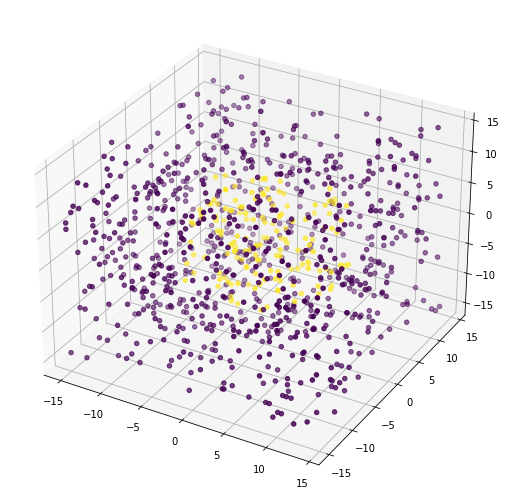

In [70]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection="3d")
ax.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=y)
plt.show()

# Naive Bayes Classifier
## Classifier Class

In [71]:
class NaiveBayesClassifier:
    def __init__(self, classes, n, high, low, laplace=False):
        self.classes = classes
        self.n = n
        self.low = low
        self.high = high
        self.laplace = laplace

        self.prior = None
        self.posterior = None

    def fit(self, x, y):
        self.prior = np.zeros(self.classes, dtype=np.float32)
        self.posterior = np.zeros((self.classes, self.n, int(self.high - self.low)), dtype=np.float32)

        # for every class
        for c in range(self.classes):
            # calcualte prior probability
            self.prior[c] = np.sum(y == c) / y.shape[0]
            # for every x
            for n in range(self.n):
                # for every possible value of x
                for val in range(self.low, self.high):
                    # calculate the probability of x being val if y is c
                    if self.laplace:
                        self.posterior[c, n, int(val-self.low)] = (np.sum(y[x[:, n] == val] == c) + 1) / (np.sum(y == c) + self.classes)
                    else:
                        self.posterior[c, n, int(val-self.low)] = np.sum(y[x[:, n] == val] == c) / np.sum(y == c)

    def predict(self, x):
        y = np.zeros((x.shape[0], self.classes))
        # for every class
        for c in range(self.classes):
            # get prior class probability
            y[:, c] = self.prior[c]
            for m in range(x.shape[0]):
                # for every example
                for n in range(x.shape[1]):
                    # caluclate the posterior using chain rule
                    y[m, c] *= self.posterior[c, n, int(x[m, n] - self.low)]
        return np.argmax(y, axis=1)

## Test

In [72]:
nbc = NaiveBayesClassifier(classes=CLASSES, n=N, high=HIGH, low=LOW, laplace=True)

x_train, y_train = sample(1000)
nbc.fit(x_train, y_train)

x_test, y_test = sample(1000)
y_predicted = nbc.predict(x_test)

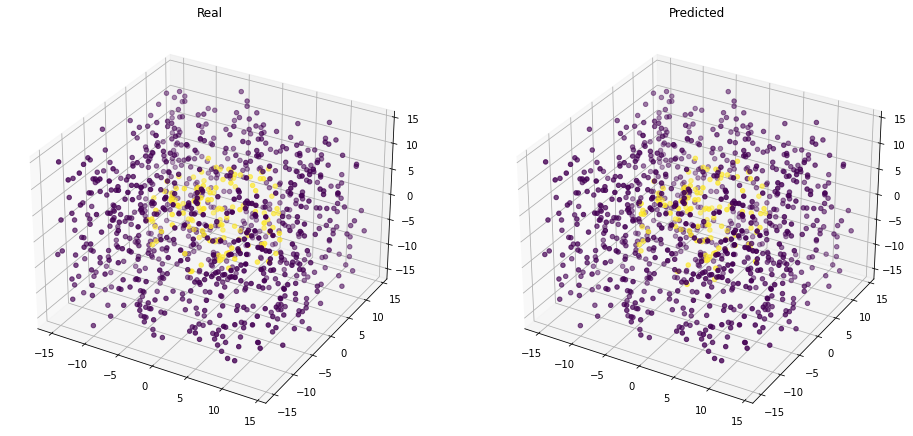

In [73]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.scatter3D(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_test)
ax.set_title("Real")

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.scatter3D(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_predicted)
ax.set_title("Predicted")
plt.show()

# Exploring Algorithm's Performance

In [74]:
nbc = NaiveBayesClassifier(classes=CLASSES, n=N, high=HIGH, low=LOW, laplace=False)
nbc_laplace = NaiveBayesClassifier(classes=CLASSES, n=N, high=HIGH, low=LOW, laplace=True)

scores = {
    "Accuracy": [],
    "Accuracy + Laplace": [],
    "F1": [],
    "F1 + Laplace": []
    }

x_test, y_test = sample(5000)

data_size = 10 ** np.linspace(1, 5, 50)
for size in data_size:
    x_train, y_train = sample(int(size))

    nbc.fit(x_train, y_train)
    y_predicted = nbc.predict(x_test)
    scores["Accuracy"].append(accuracy_score(y_predicted, y_test))
    scores["F1"].append(f1_score(y_predicted, y_test))

    nbc_laplace.fit(x_train, y_train)
    y_predicted = nbc_laplace.predict(x_test)
    scores["Accuracy + Laplace"].append(accuracy_score(y_predicted, y_test))
    scores["F1 + Laplace"].append(f1_score(y_predicted, y_test))

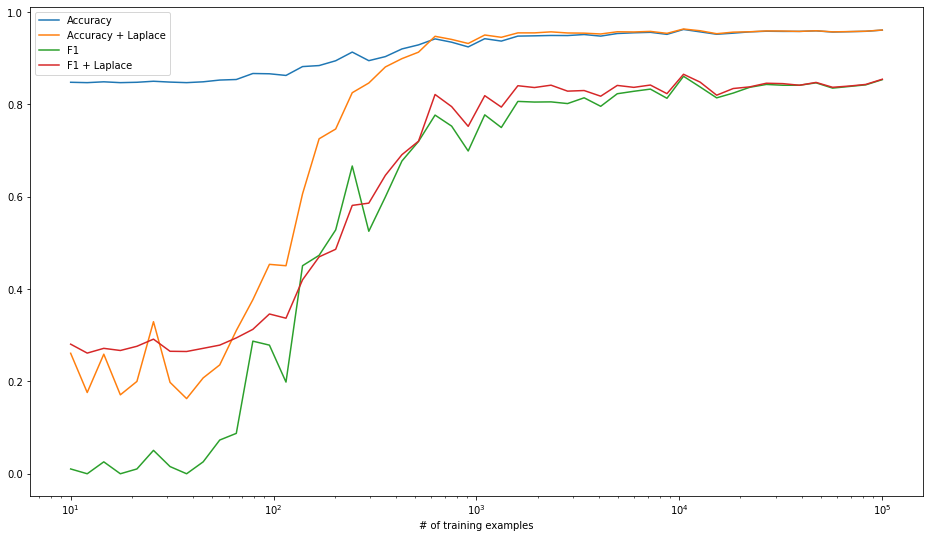

In [75]:
plt.figure(figsize=(16, 9))
for name, array in scores.items():
    plt.plot(data_size, array, label=name)
plt.xscale("log")
plt.xlabel("# of training examples")
plt.legend()
plt.show()

# The End